## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing
### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 27129 files belonging to 18 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 6451 files belonging to 18 classes.


In [4]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[245.5  242.25 245.75]
   [246.5  240.5  246.5 ]
   [232.5  227.5  232.5 ]
   ...
   [251.25 242.75 249.75]
   [223.25 216.25 222.25]
   [250.25 241.75 248.75]]

  [[237.25 234.   237.5 ]
   [250.   245.   250.  ]
   [253.25 247.5  253.25]
   ...
   [245.75 237.25 244.25]
   [242.   233.5  240.5 ]
   [244.25 237.25 243.25]]

  [[237.25 233.25 237.75]
   [251.5  246.5  251.5 ]
   [249.75 243.75 249.75]
   ...
   [236.25 229.25 235.25]
   [251.75 244.25 250.75]
   [239.75 232.75 238.75]]

  ...

  [[251.5  251.5  251.5 ]
   [250.75 250.75 250.75]
   [235.5  235.5  235.5 ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[237.75 237.75 237.75]
   [252.   252.   252.  ]
   [252.75 252.75 252.75]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[252.75 252.75 252.75]
   [249.75 249.75 249.75]
   [251.75 251.75 251.75]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   25

## To avoid Overshooting Loss function

1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [6]:
model = Sequential()

## Building Convolution Layer

In [7]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\Tushar\.conda\envs\tensorflow\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Dropout(0.25))   #To avoid Overfitting

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=1500,activation='relu'))

In [15]:
model.add(Dropout(0.4)) #To avoid overfitting

## Output Layer

In [16]:
model.add(Dense(units=18,activation='softmax'))

## Compiling Model

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 18)                  │          27,018 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,812,742 (29.80 MB)

 Trainable params: 7,812,742 (29.80 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [19]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=7)

Epoch 1/7
848/848 ━━━━━━━━━━━━━━━━━━━━ 1552s 2s/step - accuracy: 0.2682 - loss: 2.3024 - val_accuracy: 0.5917 - val_loss: 1.1521
Epoch 2/7
848/848 ━━━━━━━━━━━━━━━━━━━━ 1523s 2s/step - accuracy: 0.6066 - loss: 1.1119 - val_accuracy: 0.7390 - val_loss: 0.7266
Epoch 3/7
848/848 ━━━━━━━━━━━━━━━━━━━━ 1476s 2s/step - accuracy: 0.7150 - loss: 0.7977 - val_accuracy: 0.7639 - val_loss: 0.6955
Epoch 4/7
848/848 ━━━━━━━━━━━━━━━━━━━━ 1496s 2s/step - accuracy: 0.7550 - loss: 0.6900 - val_accuracy: 0.8028 - val_loss: 0.5650
Epoch 5/7
848/848 ━━━━━━━━━━━━━━━━━━━━ 1480s 2s/step - accuracy: 0.7874 - loss: 0.5932 - val_accuracy: 0.8151 - val_loss: 0.5237
Epoch 6/7
848/848 ━━━━━━━━━━━━━━━━━━━━ 1488s 2s/step - accuracy: 0.8287 - loss: 0.4721 - val_accuracy: 0.8248 - val_loss: 0.5171
Epoch 7/7
848/848 ━━━━━━━━━━━━━━━━━━━━ 1514s 2s/step - accuracy: 0.8546 - loss: 0.4221 - val_accuracy: 0.8284 - val_loss: 0.4958


## Evaluating Model

In [20]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print(train_loss, train_acc)

848/848 ━━━━━━━━━━━━━━━━━━━━ 307s 362ms/step - accuracy: 0.8845 - loss: 0.3252
0.29076215624809265 0.8992959856987


In [21]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print(val_loss, val_acc)

202/202 ━━━━━━━━━━━━━━━━━━━━ 71s 349ms/step - accuracy: 0.8307 - loss: 0.4809
0.4957849979400635 0.8283987045288086


## Saving Model

In [22]:
model.save('trained_HarvestGuard_Crop_model.keras')

In [23]:
training_history.history #Return Dictionary of history

{'accuracy': [0.4122525751590729,
  0.6435180306434631,
  0.7320948243141174,
  0.7635740637779236,
  0.8019462823867798,
  0.8351948261260986,
  0.847616970539093],
 'loss': [1.714998483657837,
  1.004997730255127,
  0.7540180683135986,
  0.6842745542526245,
  0.5562671422958374,
  0.46792569756507874,
  0.4507460296154022],
 'val_accuracy': [0.5916911959648132,
  0.7389551997184753,
  0.763912558555603,
  0.8028212785720825,
  0.8150674104690552,
  0.824833333492279,
  0.8283987045288086],
 'val_loss': [1.15206778049469,
  0.7265662550926208,
  0.6954920887947083,
  0.5649904012680054,
  0.5237105488777161,
  0.5170651078224182,
  0.4957851469516754]}

In [24]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [25]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


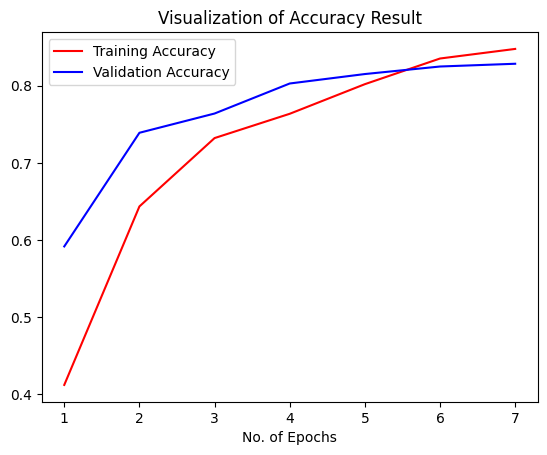

In [27]:
epochs = [i for i in range(1,8)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [28]:
class_name = validation_set.class_names
class_name

['Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Rice___Bacterialblight',
 'Rice___Blast',
 'Rice___Brownspot',
 'Rice___Healthy',
 'Rice___Tungro',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 6451 files belonging to 18 classes.


In [30]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

202/202 ━━━━━━━━━━━━━━━━━━━━ 82s 405ms/step


(array([[9.25397277e-01, 1.57094421e-03, 2.58198579e-05, ...,
         3.81073562e-10, 1.09839551e-08, 3.78504353e-07],
        [9.99822915e-01, 2.48956276e-05, 6.58022827e-08, ...,
         1.77914268e-16, 8.25012666e-14, 6.89540439e-11],
        [9.99989748e-01, 1.36273934e-08, 5.15995406e-11, ...,
         3.99089766e-21, 2.14295418e-15, 6.53255661e-14],
        ...,
        [5.71479974e-10, 3.38925652e-08, 2.75781076e-07, ...,
         5.23631694e-04, 2.40227337e-06, 9.80919540e-01],
        [1.88915261e-09, 4.36303571e-09, 1.24394974e-08, ...,
         4.80991148e-05, 2.23077397e-08, 9.98800635e-01],
        [8.42662047e-08, 1.09398975e-07, 1.83231180e-07, ...,
         9.73682930e-08, 4.69941806e-05, 9.92881179e-01]], dtype=float32),
 (6451, 18))

In [31]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [32]:
predicted_categories

<tf.Tensor: shape=(6451,), dtype=int64, numpy=array([ 0,  0,  0, ..., 17, 17, 17], dtype=int64)>

In [33]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(6451, 18), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [34]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(6451,), dtype=int64, numpy=array([ 0,  0,  0, ..., 17, 17, 17], dtype=int64)>

In [35]:
predicted_categories

<tf.Tensor: shape=(6451,), dtype=int64, numpy=array([ 0,  0,  0, ..., 17, 17, 17], dtype=int64)>

## Confution Matrix

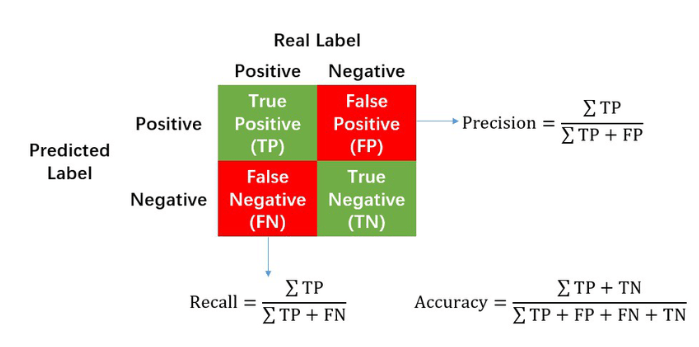









In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                               precision    recall  f1-score   support

                        Potato___Early_blight       0.94      0.98      0.96       485
                         Potato___Late_blight       0.89      0.90      0.89       485
                             Potato___healthy       0.92      0.96      0.94       456
                       Rice___Bacterialblight       0.43      0.75      0.55        83
                                 Rice___Blast       0.70      0.78      0.73       125
                             Rice___Brownspot       0.70      0.48      0.57        64
                               Rice___Healthy       0.91      0.83      0.87        75
                                Rice___Tungro       0.73      0.40      0.51        93
                      Tomato___Bacterial_spot       0.93      0.93      0.93       425
                        Tomato___Early_blight       0.78      0.73      0.76       480
                         Tomato___Late_bli

In [38]:
cm = confusion_matrix(y_true,predicted_categories)
cm

array([[473,   7,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,   1,
          0,   0,   0,   0,   0],
       [  7, 436,  23,   0,   0,   0,   0,   0,   0,   5,  11,   0,   2,
          0,   0,   0,   0,   1],
       [  1,   4, 438,   0,   0,   0,   0,   0,   0,   0,   3,   3,   0,
          0,   4,   0,   2,   1],
       [  0,   0,   0,  62,  11,   3,   2,   5,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,  26,  97,   1,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,  10,  17,  31,   0,   6,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   7,   4,   1,  62,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,  35,  10,   7,   3,  37,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0, 395,  10,   1,   1,   5,
          0,   2,   8,   0,   3],
       [ 16,   9,   1,   2,   0,   1,

### Confution Matrix Visualization

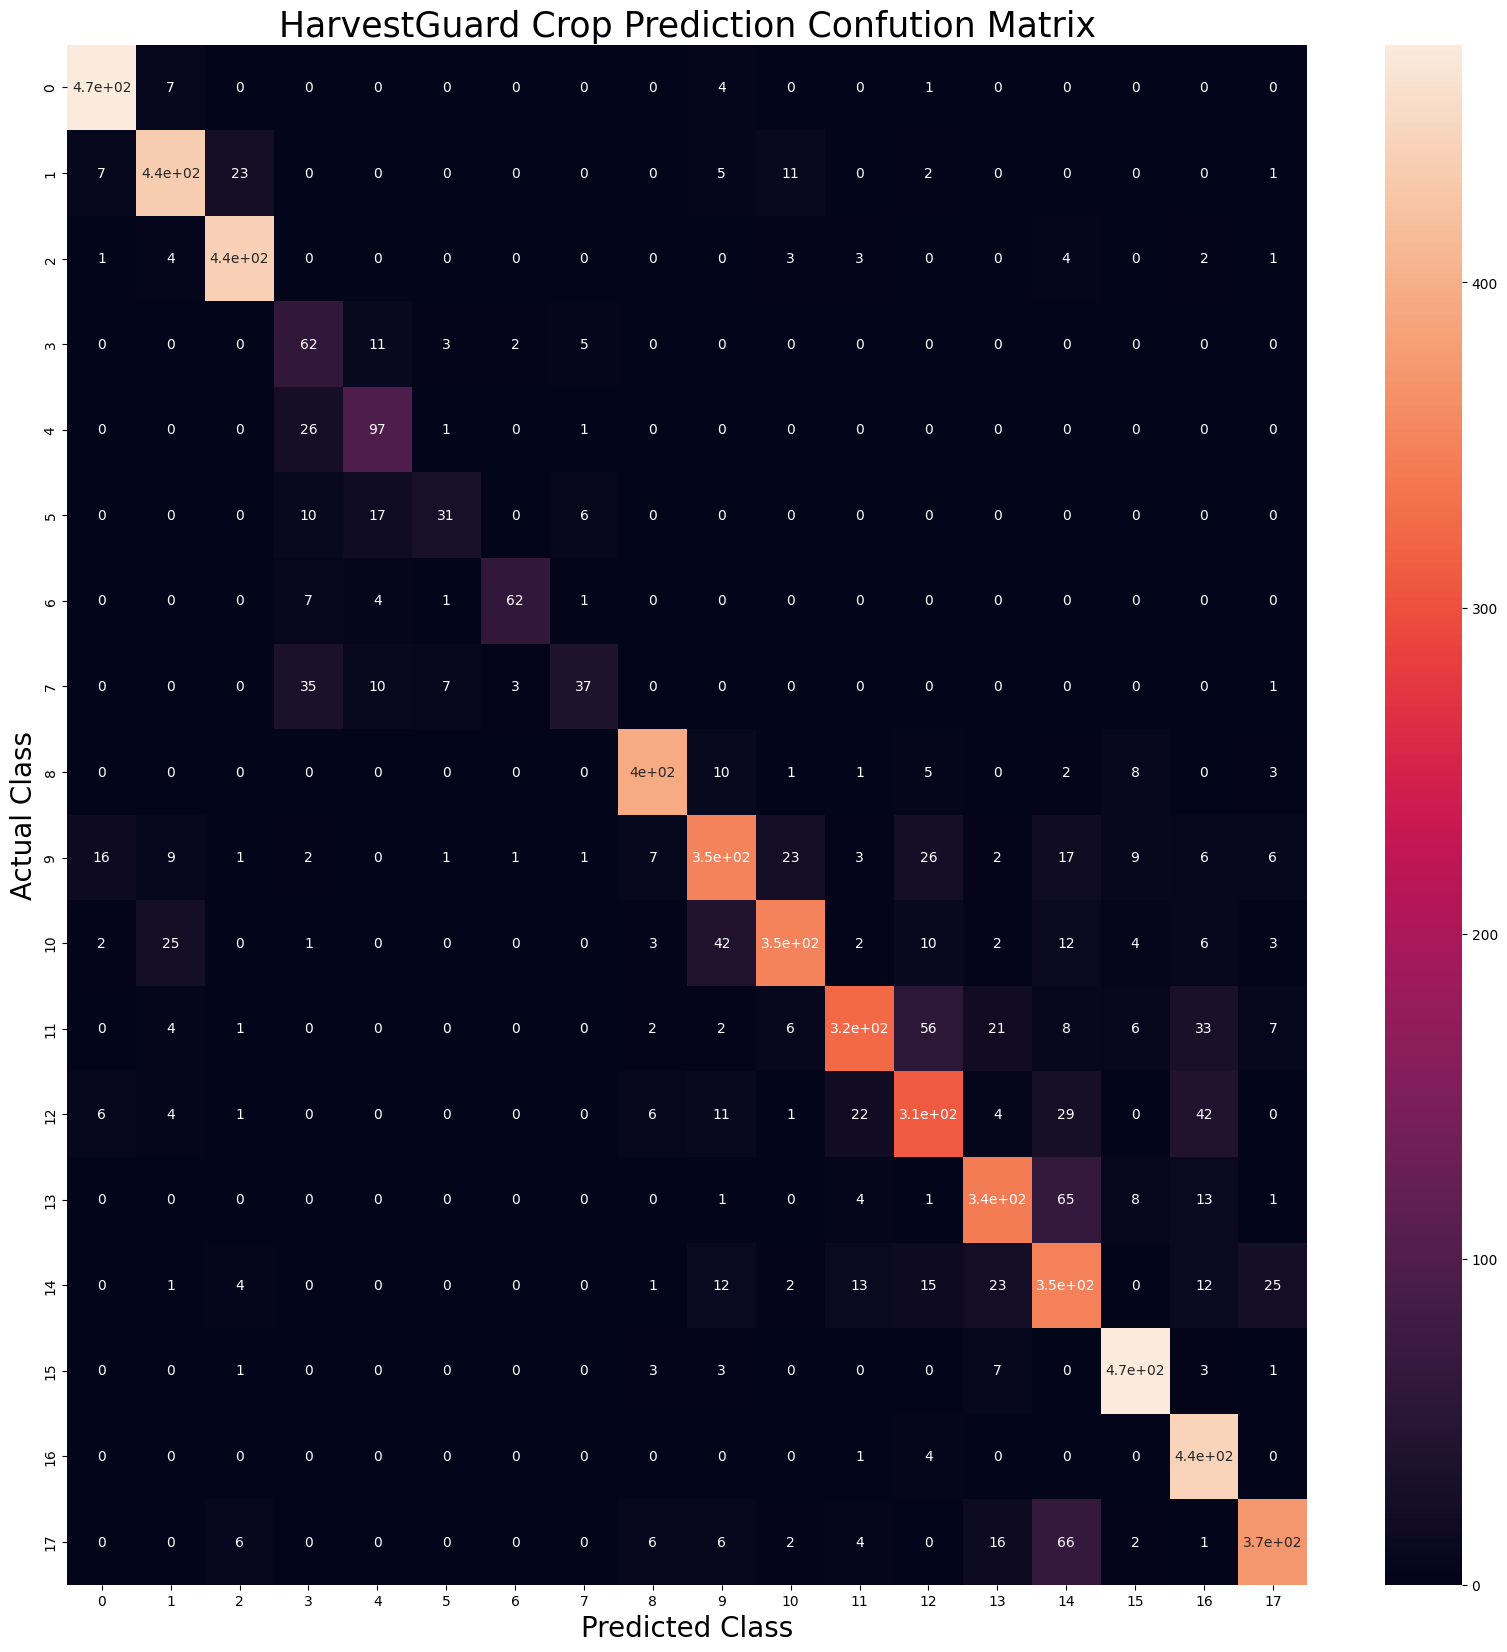

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("HarvestGuard Crop Prediction Confution Matrix",fontsize=25)
plt.show()